### Simulation of the Bouchaud-Mezard model

We study here a discretized version of the model of the economy proposed by JPB&MM (Bouchaud, J. P., & Mézard, M. (2000). Wealth condensation in a simple model of economy. Physica A: Statistical Mechanics and its Applications, 282(3-4), 536-545. https://www.sciencedirect.com/science/article/pii/S0378437100002053 ).

In this version of the model, we consider an random interaction network schematized by an adjaciency matrix $A^0_{ij}=A^0_{ji}$. The random network is a regular random graph.

The equations of the model are the following for individuals:

$$ \frac{dW_i}{dt} = \eta_i(t) W_i + J_0\sum_j A^0_{ij}(W_j -W_i) - \phi W_i + f \kappa_i V$$

where parameters are: 
- $N$ number of agents
- $W_i$ (w[i]) wealth of individual i
- $\phi$ (phi) tax rate
- $f$ (f) tax redistribution rate
- $\kappa_i$ (kappa) weight of redistribution to i 
- $J_{ij}=J_0$ is a constant (in this version!)
- $V$ (V) state wealth
- $\eta_i(t)$ (eta[i]) Gaussian random noise with mean $m$ (m) and variance $s$ (s)

for the state
$$ \frac{dV}{dt} =  \sigma \xi(t)V +\phi W + (\mu-\phi)V $$

where:
- $V$ (V) is the wealth of the state
- $W= \sum_i W_i$ (Wtot)
- $\xi(t)$ (xi) is the noise (with mean 0 and variance 1)
- $\sigma$ (sigma) is the real variance and $\mu$ (mu) is the mean 

To solve the model is convenient to express it in terms of an 
$N+1$-dimensional system of equations for the vector 
$X = (W_0, ...., W_{N-1}, V)$ which obeys

$$dX_i = \sum_j A_{ij} X_j dt + B_i X_i d\psi_i$$

where 
- $A_{ij} = A^0_{ij}J_0 + \delta_{ij} (m-J_0\sum_k A^0_{ki} -\phi)$ for $i,j=0,N-1$   
- $A_{iN}=m+f k_i$ for $i<N$ 
- $A_{Ni}=\phi$ for $i<N$
- $A_{NN}=(\mu-\phi)$
- $B_i = s$ for $i<N$ and $B_i=\sigma$ for $i=N$
- $d\psi_i$ are independent Wiener processes (with variance 1 and zero mean)

In this particular example we neglect the contribution of the state as in the original paper.

In [1]:
import numpy as np
import sdeint
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import networkx as nx
import wealth_condensation as wc

In [39]:
## define parameters
N=200
m=0.5
s=1.
mu=0.01
sigma=.1
sigmat=0.
J0=2.
c=4
# no interaction with state
phi=0.
f=0.

In [40]:
## Use networkx to generate a regular random graph with degree c
G=nx.random_regular_graph(4,N)

In [41]:
# create adjaciency matrix
A0=nx.to_numpy_array(G)

In [42]:
# check degree of each node
np.sum(A0,axis=0)

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [43]:
## Option: use a random graph
# A0=wc.simulate.adjaciency_matrix(c,N)
## analyze network structure
#G=wc.analyze.network_structure(A0)
## Check connected components
#nx.number_connected_components(G)
## Check number of nodes
#G.number_of_nodes()
# check degree of each node
#np.sum(A0,axis=0)

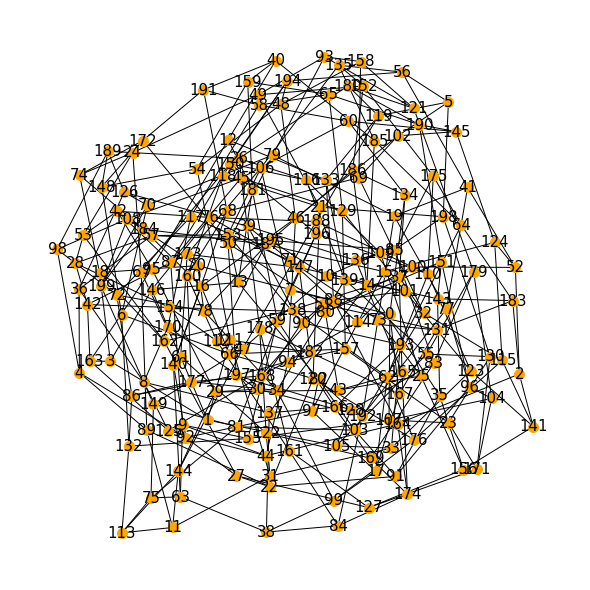

In [44]:
## Plot the graph
wc.analyze.plot_network(G)

In [45]:
# Set time steps
t_tot=20
dt=.01
n_step=int(t_tot/dt)

In [46]:
# Define the interaction matrix
A,B=wc.simulate.interaction_matrix(N,mu,sigmat,m,phi,f,J0,A0,sigma,s,c)


In [47]:
## initial conditions
x=np.ones(N+1)

In [48]:
# use sdeint to simulate the equations
result=wc.simulate.integrate_sde(x,A,B,t_tot,dt)


In [49]:
# reshape wealth time series excluding state
#wealth=result[int(n_step/2):,:]
wealth=result[:,:N]
tot_wealth=wealth.sum(axis=1)
wealth_share=wealth/tot_wealth.reshape(-1,1)


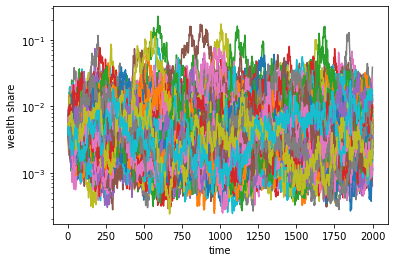

In [50]:
# plot wealth share
for i in range(N):
    plt.plot(wealth_share[:,i])
#    plt.xlim(0,100)
    plt.yscale('log')
    plt.xlabel("time")
    plt.ylabel("wealth share")
#    plt.ylim(1e-10,1e0)

In [51]:
# compute inverse partecipation ratio
wc.analyze.inv_part_ratio(wealth_share,N)

0.013349486701665676

In [52]:
# rank wealth and sort data
ii=np.argsort(wealth[0,:])
wealth_share2=wealth_share[:,ii]

In [53]:
ranks=np.argsort(wealth_share2, axis=1)

In [54]:
# create dataframe
df_r=pd.DataFrame(data=ranks)

In [55]:
# define deciles
rank_q=np.int32(10*df_r/N)

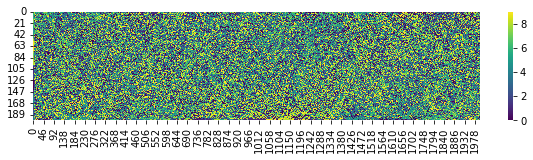

In [56]:
# plot decile evolution 
df_q=pd.DataFrame(data=rank_q)
fig, ax = plt.subplots(figsize=(10, 2))
ax=sns.heatmap(df_q.T, cmap="viridis")
#plt.xlim(0,1000)

(0.0, 100.0)

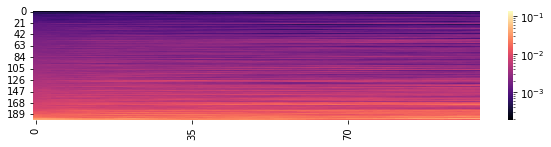

array([[0.00430553, 0.00130576, 0.00174711, ..., 0.00370912, 0.0050628 ,
        0.01981369],
       [0.00450581, 0.00123987, 0.00159022, ..., 0.00392008, 0.00473383,
        0.02050567],
       [0.00455762, 0.00119641, 0.00167097, ..., 0.00387967, 0.00510989,
        0.01918425],
       ...,
       [0.00262975, 0.00139316, 0.00966259, ..., 0.00156304, 0.00421471,
        0.00087889],
       [0.00279502, 0.00151792, 0.00981407, ..., 0.00167582, 0.00461552,
        0.00088563],
       [0.00275912, 0.00158192, 0.0101312 , ..., 0.00175913, 0.00441829,
        0.00089588]])